# Integral Computation using Amplitude Estimation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. The Amplitude Estimation Problem

The amplitude estimation problem can be defined in the following way:

Let an unitary operator $\mathbf{A}$ that acts upon an initial n-qubits state $|0\rangle_n$ in the following way:

$$|\Psi\rangle = \mathbf{A}|0\rangle_n = \sum_{i=0}^{2^n-1} a_i |i\rangle_n$$

Now we are interested in the sub-state composed by some basis states $J=\{j_0, j_1, \cdots, j_l\}$, so we can write down:

$$|\Psi\rangle = \mathbf{A}|0\rangle_n = \sum_{j \in J} a_j |j\rangle_n + \sum_{i \notin J} a_i |i\rangle_n$$

If we define the sub-states $|\Psi_0\rangle$ and $|\Psi_1\rangle$ as follows:

$$|\Psi_0\rangle = \frac{1}{\sqrt{a}}\sum_{j \in J} a_j |j\rangle_n \;\; and \;\; |\Psi_1\rangle = \frac{1}{\sqrt{1-a}}\sum_{i=0, i \notin J}^{2^n-1} a_i |i\rangle_n$$

The final $|\Psi\rangle$ can be expresed as:

 $$|\Psi\rangle= \mathbf{A}|0\rangle_n  = \sqrt{a} |\Psi_0\rangle  + \sqrt{1-a}|\Psi_1\rangle$$

In the estimation problem we want to estimate the amplitude of $|\Psi_0\rangle$: $a$

## 2. MonteCarlo Solution.

The naive solution (we call **MonteCarlo** solution from now) is measuring the all the qbits $N$ times and get the probability of obtaining the desired state $|\Psi_0\rangle$. In this case the estimator of $a$, $\tilde{a}$ will be:

$$\tilde{a} = P_{|\Psi_0\rangle} = \frac{Number \; of \; times \; |\Psi_0\rangle \; was \; measured}{N}$$


The error $\epsilon_{a}$ of this $\tilde{a}$ estimator can be obtained using the *Chernoff-Hoeffding* bound:

$$P[\tilde{a} \in |a_j-\epsilon_{a}, a_j+\epsilon_{a}|] \geq 2e^{-2 N \epsilon_{a}^2}$$

So if we want $P[\tilde{a} \in |a_j-\epsilon_{a}, a_j+\epsilon_{a}|] \geq \alpha$ ($\alpha \in [0,1]$) then:

$$\epsilon_a^2 \leq \frac{1}{2N}Ln[\frac{2}{\alpha} ]$$

So the error for the estimator $\tilde{a}$ will have the following behaviour with the number of measurements $N$:

$$\epsilon_a \sim \frac{1}{\sqrt{N}}$$

## 3. Amplitude Amplification

In the equation of the final state $|\Psi\rangle$ we can do the following substitution:

$$\sqrt{a} = \sin\left(\theta\right)$$

Now the equation will be:

$$|\Psi\rangle= \mathbf{A}|0\rangle_n  = \sqrt{a} |\Psi_0\rangle  + \sqrt{1-a}|\Psi_1\rangle = \sin\left(\theta\right) |\Psi_0\rangle + \cos\left(\theta\right) |\Psi_1\rangle$$
 
Now we can build a Grover-like operator based on $\mathcal{A}$ following:

$$\mathbf{G}(\mathbf{A}) = \mathbf{A} \left(\hat{I} - 2|0\rangle\langle 0|\right) \mathbf{A}^{\dagger}\left(\hat{I} - 2|\Psi_0\rangle\langle \Psi_0|\right)$$

This  Grover-like operator acts in the following way: 

$$\mathbf{G}^k |\Psi\rangle = \mathbf{G}^k \mathbf{A} |0\rangle_n=  \sin\big((2k+1)\theta\big) |\Psi_0\rangle  + \cos\big((2k+1)\theta\big)|\Psi_1\rangle$$


## 4. Phase Estimation Solution

The canonical Amplitude Estimation uses the *Quantum Phase Estimation* algorithm. The algorithm allocates $m$ ancilla qubits  and apply over $|\Psi\rangle$ geometrically increases powers of $\mathbf{G}$ controlled by the ancillas as shown in the following Figure:

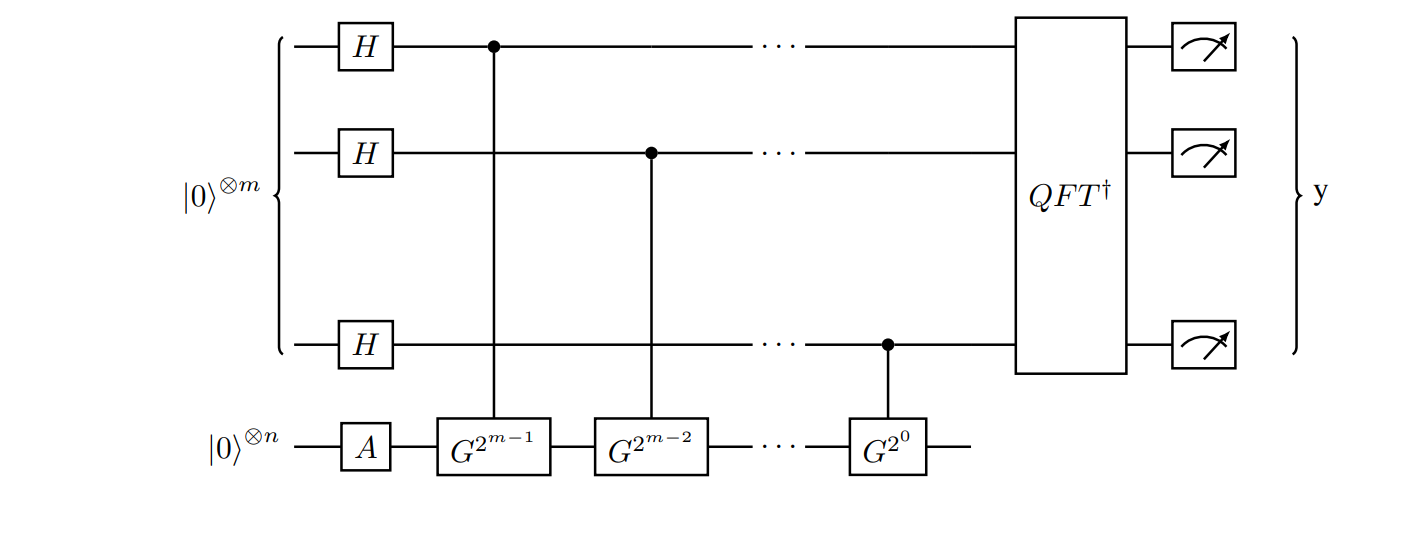


Finally over the ancillas qubits the complex conjugate of the Quantum Fourier Transformation ($QFT^{\dagger}$ in the Figure) is applied and the ancilla qubits are measured generating and integer $y \in \{0,1,...M-1\}$, where $M=2^m$ can be mapped to an angle: $\tilde{\theta} = \frac{y\pi}{2^m}$. In this case the estimation will be: $\tilde{a}=\sin^2(\tilde{\theta})$ with a probability of at least $\frac{8}{\pi^2} \sim 81 \%$

$$\epsilon = |\tilde{a}-a| \leq \frac{2\pi\sqrt{a(1-a)}}{M} + \frac{\pi^2}{M^2}$$

So in this case the error for the estimator $\tilde{a}$ will scale with:


$$\epsilon_a \sim \frac{1}{M}$$

In this case a quadratic speed up over the **MonteCarlo** method is obtained.

## 5. Amplitude Estimation without Phase Estimation


**Phase Estimation** algorithm is computationally expensive and present quantum computers do not have enough quality, neither qubits, for properly implemented it. There exists, however, several algorithms that can solve the *Amplitude Estimation* problem without the use of **Phase Estimation** and with scaling errors between **MonteCarlo** and **Phase estimation**, this is 

$$\frac{1}{N} < \epsilon < \frac{1}{\sqrt{N}} $$

These algorithms are known as *Amplitude Estimation* algorithms. Main idea of these algorithms is taking advantage of the fact:

$$\mathbf{G}^k |\Psi\rangle = \mathbf{G}^k \mathbf{A} |0\rangle_n=  \sin\big((2k+1)\theta\big) |\Psi_0\rangle  + \cos\big((2k+1)\theta\big)|\Psi_1\rangle$$

and in the use of very smart strategies for selecting $k$ in order to maximize the probability of measuring the $|\Psi_0\rangle$:

$$P[|\Psi_0\rangle] = \sin^2\big((2k+1)\theta\big)$$

## 6. Benchmarking Amplitude Estimation algorithms.

Here we propose a benchmark procedure for evaluating *Amplitude Estimation* algorithms by computing integrals. 

### 6.1.  Description of the problem

The benchmark problem is the computation of the integral of a function $f(x)$ in a closed interval $[a,b] \subset \mathbf{R}$:

$$I = \int_a^bf(x)dx$$

In particular we propose to use $f(x) = \sin x$, whose integral is very well known:

$$I = \int_a^{b}\sin(x)dx = -\cos x |_a^b = \cos(a)-\cos(b)$$

Additionally 3 different integration intervals will be used:

1. $[0, \frac{3\pi}{8}]$ : $I = \int_0^{\frac{3\pi}{8}}\sin(x)dx = 0.6173165676349102$
2. $[\frac{3\pi}{4}, \frac{9\pi}{8}]$ : $I = \int_{\frac{3\pi}{4}}^{\frac{9\pi}{8}}\sin(x)dx = 0.2928932188134523$
3. $[\pi, \frac{5\pi}{4}]$ : $I = \int_{\pi}^{\frac{5\pi}{4}}\sin(x)dx = -0.2928932188134523$

So the *Amplitude Estimation* algorithm should be used for computing each on of the 3 integrals. 


In [ ]:
def sin_integral(a,b):
    return np.cos(a)-np.cos(b)

In [ ]:
start = [0.0, 3.0*np.pi/4.0, np.pi]
end = [3.0*np.pi/8.0, 9.0*np.pi/8.0, 5.0*np.pi/4.0]

#### $1^{st}$  Domain: $[0, \frac{3\pi}{8}]$ 

In this domain the function is strictly posiitve defined.

In [ ]:
a = start[0]
b = end[0]
domain = np.linspace(a,b, 100)
plt.plot(domain, np.sin(domain))
#plt.show()

In [ ]:
print('Integral in first domain: {}'.format(sin_integral(a,b)))

#### $2^{nd}$ Domain: $[\frac{3\pi}{4}, \frac{9\pi}{8}]$ 

In this domain the function is not strictly positive defined but its integral is positive.

In [ ]:
a = start[1]
b = end[1]
domain = np.linspace(a,b, 100)
plt.plot(domain, np.sin(domain))

In [ ]:
print('Integral in second domain: {}'.format(sin_integral(a,b)))

#### $3^{rd}$ Domain: $[\pi, \frac{5\pi}{4}]$

In this domain the function is not strictly positve defined and the intgral is negative!

In [ ]:
a = start[1]
b = end[1]
domain = np.linspace(a,b, 100)
plt.plot(domain, np.sin(domain))

In [ ]:
print('Integral in thrid domain: {}'.format(sin_integral(a,b)))

### 6.2. Domain Discretization

First thing to do for computing the integral in a computer is the discretization of the domain. In the benchmark we allways discretize the domain in $2^n$ intervals, with $n \in \mathbf{N}$:

$$\{[x_0, x_1], [x_1, x_2], ..., [x_{2^n-1}, x_{2^n}]\}$$ 

Where

1. $x_{i+1} < x_{i}$
2. $a = x_0$
3. $b = x_{2^n}$

In [ ]:
#First integration domain
a = start[0]
b = end[0]
#For fix the number of discretization intervals
n=4
domain_x = np.linspace(a, b, 2**n+1)

### 6.3. Function discretization

Now using the domain discretization we need to discretized $f(x)$. In our procedure following arrays should be constructed:

1. $\Delta x_i = x_{i+1} - x_{i} = \frac{b-a}{2^n}$
2. $f_{x_i} = \frac{f(x_{i+1}) + f(x_{i})}{2}$
3. $f_{x_i} \Delta x_i = f_{x_i} \frac{b-a}{2^n}$

Using these computed arrays the desired integral can be approximated by Riemann sum:

$$S_{[a,b]} = \sum_{i=0}^{2^n-1} f_{x_i} \Delta x_i$$

When $\Delta x_i \rightarrow 0$ then $I =\int_a^{b}\sin(x)dx \approx S_{[a,b]}$.

Using $\Delta x_i  = \frac{b-a}{2^n}$ then we can write down:


$$S_{[a,b]} = \sum_{i=0}^{2^n-1} f_{x_i} \frac{b-a}{2^n} = \frac{b-a}{2^n} \sum_{i=0}^{2^n-1} f_{x_i}$$

In [ ]:
#The selected fucntion
f = np.sin

#Discretization of the selected function
f_x = []
x_ = []
for i in range(1, len(domain_x)):
    step_f = (f(domain_x[i]) + f(domain_x[i-1]))/2.0
    #print(i)
    f_x.append(step_f)
    x_.append((domain_x[i] + domain_x[i-1])/2.0)
f_x = np.array(f_x)
x_ = np.array(x_)


In [ ]:
plt.plot(domain_x, f(domain_x), '-o')
plt.plot(x_, f_x, 'o')
plt.legend(['original', 'half'])

In [ ]:
Riemann = (np.sum(f_x)*(b-a))/2**n
print("Riemann sum integral: {}".format(Riemann))
print('Exact Integral in first domain: {}'.format(sin_integral(a,b)))

### 6.4 Array Normalisation

The idea is encode the $2^n$ discretized array $f_{x_i}$ in a $n+1$ qubit circuit. Before doing that we are going to normalise the arrray in the following way:


$$f\_norm_{x_i} = \frac{f_{x_i}}{\max(|f_{x_i}|)}$$

If $\max{|f_{x_i}|} \leq 1$ then this step can be omitted.

$$S_{[a,b]} = \frac{b-a}{2^n} \sum_{i=0}^{2^n-1} f_{x_i} = \frac{b-a}{2^n} \sum_{i=0}^{2^n-1}  \max(|f_{x_i}|) f\_norm_{x_i} =\frac{\max(|f_{x_i}|)(b-a)}{2^n} \sum_{i=0}^{2^n-1} f\_norm_{x_i}$$

In [ ]:
normalization = np.max(np.abs(f_x))
print("Normalization constant: {}".format(normalization))
#normalization = 1.0
f_norm_x = f_x/normalization
Riemann = normalization * np.sum(f_norm_x)*(b-a)/2**n
#Now we need to be aware of the normalization constant when computing Rieman sum
print("Riemman sum integral: {}".format(Riemann))
print('Exact Integral in first domain: {}'.format(sin_integral(a,b)))

### 6.5 Encoding function in a quantum circuit.

Now we need to codified the $f\_norm_{x_i}$ array in a quantum circuit.

Several procedures can be used. In this benchmark we are going to use following one:

1. Initialize $n+1$ qubits, where $n$ should be equal to the $n$ of the $2^n$ discretization intervals:

$$|0\rangle\otimes|0\rangle_n \tag{1}$$

2. Apply the uniform distribution over the first $n$ qubits:

$$\big(I \otimes H^{\otimes n}\big)\big(|0\rangle \otimes|0\rangle_{n}\big) = |0\rangle \otimes H^{\otimes n}|0\rangle_{n}=
\frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^{n}-1}|0\rangle \otimes|i\rangle_{n} \tag{2}$$

3. Creates an operator $\mathbf{U}_f$ for encoding the $f\_norm_{x_i}$. This operator acts in the following way:

$$\mathbf{U}_f|i\rangle_n \otimes |0\rangle = |i\rangle_n \otimes \big(f\_norm_{x_i}|0\rangle +  \beta_i |1\rangle \big) \tag{3}$$

4. In the equation $(3)$ the coeficient of $|1\rangle$ it is not important for us the only important coeficient it is the $|0\rangle$ one. 

5. Apply the $\mathbf{U}_f$ operator over $n+1$ qubits:

$$\mathbf{U}_f\left(I\otimes H^{\otimes n}\right)|0\rangle\otimes|0\rangle_{n} \tag{4}$$

6. Applying equation $(2)$ on $(4)$:

$$\mathbf{U}_f\left(I\otimes H^{\otimes n} \right)|0\rangle\otimes|0\rangle_{n} = \mathbf{U}_f \left(\frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^{n}-1} |0\rangle\otimes|i\rangle_{n}\right) = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^{n}-1} \mathbf{U}_f \left(|0\rangle\otimes|i\rangle_{n}\right) \tag{5}$$

7. Applying equation $(3)$ on $(5)$:

$$\mathbf{U}_f\left(I\otimes H^{\otimes n} \right)|0\rangle\otimes|0\rangle_{n} = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^{n}-1} |i\rangle_{n} \otimes \left(f\_norm_{x_i}|0\rangle + \beta_i|1\rangle \right) \tag{6}$$

8. Finally the uniform distribution will be applied over the first n qubits again:

$$|\Psi \rangle = \left(I\otimes H^{\otimes n} \right)\mathbf{U}_f\left(I\otimes H^{\otimes n} \right)|0\rangle\otimes|0\rangle_{n} \tag{7}$$

9. So applying $6$ on $(7)$:

$$|\Psi \rangle = \left(I\otimes H^{\otimes n} \right)\mathbf{U}_f\left(I\otimes H^{\otimes n} \right)|0\rangle\otimes|0\rangle_{n} = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^{n}-1} H^{\otimes n}|i\rangle_{n} \otimes \left(f\_norm_{x_i}|0\rangle + \beta_i|1\rangle \right) \tag{6}$$

10. We are interested only in $|0\rangle \otimes |i\rangle_{n}$ so we don't need to take into acount other terms, so $(6)$ can be expresed as:

$$|\Psi \rangle = \left(I\otimes H^{\otimes n} \right)\mathbf{U}_f\left(I\otimes H^{\otimes n} \right)|0\rangle\otimes|0\rangle_{n} = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^{n}-1} f\_norm_{x_i} H^{\otimes n}|i\rangle_{n} \otimes |0\rangle + \cdots \tag{7}$$

11. We know that:

$$H^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{j=0}^{2^n}\sum_{k=0}^{2^n} (-1)^{jk} |j\rangle_n  {}_{n} \langle k|$$ 

12. So:
$$H^{\otimes n} |i\rangle_n = \frac{1}{\sqrt{2^n}} \sum_{j=0}^{2^n}\sum_{k=0}^{2^n} (-1)^{jk} |j\rangle_n  {}_{n} \langle k|i\rangle_n = \frac{1}{\sqrt{2^n}} \sum_{j=0}^{2^n} (-1)^{ji} |j\rangle = \frac{1}{\sqrt{2^n}} |0\rangle_n + \frac{1}{\sqrt{2^n}} \sum_{j=1}^{2^n} (-1)^{ji} |j\rangle \tag{8}$$ 

13. Finally applying $(8)$ in $(7)$ and taking only into account the $|0\rangle \otimes |0\rangle_{n}$  

$$|\Psi \rangle = \left(I\otimes H^{\otimes n} \right)\mathbf{U}_f\left(I\otimes H^{\otimes n} \right)|0\rangle\otimes|0\rangle_{n} = \frac{1}{2^n} \sum_{i=0}^{2^{n}-1} f\_norm_{x_i} |0\rangle\otimes|0\rangle_{n} + \cdots \tag{9}$$

14. Now we measured the probability of obtain the state $|\Psi_0\rangle = |0\rangle \otimes |0\rangle_n$

$$\mathbf{P}[|\Psi_0\rangle] = \left| \; \langle \Psi_0\ |\Psi\rangle \; \right|^2 = \left| \; \langle \Psi_0\ | \frac{1}{2^n} \sum_{i=0}^{2^{n}-1} f\_norm_{x_i} |\Psi_0\rangle\; \right|^2 = \left| \frac{1}{2^n} \sum_{i=0}^{2^{n}-1} f\_norm_{x_i} \right|^2  \tag{10}$$ 


15. So reorganising $(10)$:

$$ \left| \sum_{i=0}^{2^{n}-1} f\_norm_{x_i} \right| = 2^{n} \sqrt{\mathbf{P}[|\Psi_0\rangle]} \tag{11}$$

16. Undoing the array normalisation:

$$ \left| \sum_{i=0}^{2^{n}-1} \frac{f_{x_i}}{\max(f_{x_i})} \right| = 2^{n} \sqrt{\mathbf{P}[|\Psi_0\rangle]} \tag{12}$$

Finally we reorganise $(12)$ and the desired Riemann sum can be obtained:



$$\left| \sum_{i=0}^{2^{n}-1} f_{x_i} \right| = \max(f_{x_i}) 2^{n} \sqrt{\mathbf{P}[|\Psi_0\rangle]}$$

As explained before the Riemann sum is:

$$S_{[a,b]} = \frac{b-a}{2^n} \sum_{i=0}^{2^n-1} f_{x_i}$$

Then:

$$\frac{2^n}{b-a} S_{[a,b]} = \max(f_{x_i}) 2^{n} \sqrt{\mathbf{P}[|\Psi_0\rangle]}$$

So we have obtained an estimation of the desired integral:

$$\tilde{S}_{[a,b]} = \frac{\max(f_{x_i}) (b-a)}{2^n} \left(2^{n} \sqrt{\mathbf{P}[|\Psi_0\rangle]}\right)$$


The $2^n$ terms can be erased from equation by for now we are going to keep it!!!

So in our procedure the operator $\mathbf{A}$ will be:

$$\mathbf{A}(g_{x_i}) = \left(I\otimes H^{\otimes n} \right)\mathbf{U}_f\left(I\otimes H^{\otimes n} \right)$$

So for each of the 3 integrals an operator $\mathbf{A}$ should be built.



#### Operator $\mathbf{U}_f$

Here we are going to explain how to build the operator $\mathbf{U}_f$:

1. Given the array $f\_norm_{x_i}$ we need to compute: $\phi_{x_i} = \arccos({f\_norm_{x_i}})$.
2. for a given state $|i\rangle_n \otimes |0\rangle$ we need to implement a rotation around the *y-axis* over the last qubit ($|0\rangle$) controlled by the state $|i\rangle_n$ of $2*\phi_{x_i}$. So we need to build following operation:

$$|i\rangle_n \otimes |0\rangle \rightarrow  |i\rangle_n \otimes \mathbf{R}_y(2*\phi_{x_i})|0\rangle = |i\rangle_n \otimes \left( \cos(\phi_{x_i})|0\rangle + \sin(\phi_{x_i})|1\rangle \right)  $$

3. Now undoing the $\phi_{x_i}$ and doing $\beta_i = \sin(\phi_{x_i})$ we can obtain the desired operator $\mathbf{U}_f$:

$$|i\rangle_n \otimes \left(f\_norm_{x_i} |0\rangle +  \beta_i|1\rangle \right) = \mathbf{U}_f |i\rangle_n \otimes |0\rangle$$

In the case of **QQuantLib** the complete encoding procedure can be executed in a transparent way by using the python class *Encoding* from *QQuantLib.DL.encoding_protocols* module.

This class creates the operator $\mathbf{A}$ under the *oracle* property of the *Encoding* class

In [ ]:
import sys
sys.path.append("../../../")

In [ ]:
from QQuantLib.DL.encoding_protocols import Encoding

In [ ]:
encoding_object = Encoding(
    array_function=f_norm_x, 
    array_probability=None, 
    encoding=2
)
encoding_object.run()

In [ ]:
operator_A = encoding_object.oracle
%qatdisplay operator_A

Additionally the *function_gate* attribute give us acces to the operator: $\mathbf{U}_g$

In [ ]:
operator_Uf = encoding_object.function_gate
%qatdisplay operator_Uf --depth 

## 7. Grover-like operator of $\mathbf{A}$

For each one of the 3 $\mathbf{A(f_{x_i})}$ operators the Grover-like operator should be constructed using:

$$\mathbf{G}(\mathbf{A(f_{x_i})}) = \mathbf{A(f_{x_i})} \left(\hat{I} - 2|0\rangle\langle 0|\right) \mathbf{A(f_{x_i})}^{\dagger}\left(\hat{I} - 2|\Psi_0\rangle\langle \Psi_0|\right)$$

In the case of our **QQuantLib** the Grover-like operator building can be done in an easy way using the **grover** function from *QQuantLib.AA.amplitude_amplification* module. The input of this function will be the following attribtues of the encoding class:

* *oracle*
* *target*
* *index*

In [ ]:
from QQuantLib.AA.amplitude_amplification import grover

In [ ]:
operator_G = grover(
    oracle = encoding_object.oracle,
    target = encoding_object.target,
    index = encoding_object.index
)

In [ ]:
%qatdisplay operator_G --depth 2

## 8. Amplitude Estimation Algorithm

For each of the  3 $\mathbf{A(f_{x_i})}$ operators and their correspondent Grover-like operators $\mathbf{G}(\mathbf{A(f_{x_i})})$ the desired *Amplitude Estimation* algorithm can be used. 

An amplitude estimation algorithm, usually, returns the probabiliy of getting the state $|\Psi_0\rangle$, so a post post-proccesing, for getting the estimator of the integral, should be done, as explained in section 6:

$$\tilde{S}_{[a,b]} = \frac{\max(f_{x_i}) (b-a)}{2^n} \left(2^{n} \sqrt{\mathbf{P}[|\Psi_0\rangle]}\right)$$


In case the algorithm returns some different value an additional post-processing should be done in order to get the $\tilde{S}_{[a,b]}$ integral estimator.

In the case of  **QQuantLib** steps 7 and 8 can be done straightforward using the different *Amplitude Estimation* classes of the modules from package *QQuantLib.AE*. 
In fact using the **AE** class from *QQuantLib.AE.ae_class* we can acces to all the implemented algorithms in an easy way

In [ ]:
#This cell loads the QLM solver.
#QLMaaS == False -> uses PyLinalg
#QLMaaS == True -> try to use LinAlg (for using QPU as CESGA QLM one)
from QQuantLib.utils.qlm_solver import get_qpu
QLMaaS = False
linalg_qpu = get_qpu(QLMaaS)

In [ ]:
from QQuantLib.AE.ae_class import AE

First we create a base configuration dictionary for the **AE** object

In [ ]:
#AE base configuration dictionary
ae_dictionary = {
    #QPU
    'qpu': linalg_qpu,
    #Multi controlled decomposition
    'mcz_qlm': False, 
    
    #shots
    'shots': None,
    
    #MLAE
    'schedule': [
        [],
        []
    ],
    'delta' : None,
    'ns' : None,
    
    #CQPEAE
    'auxiliar_qbits_number': None,
    #IQPEAE
    'cbits_number': None,
    #IQAE & RQAQE
    'epsilon': None,
    #IQAE
    'alpha': None,
    #RQAE
    'gamma': None,
    'q': None
}

We are going to use the **IQAE** algorithm for solving the integral

In [ ]:
ae_dictionary.update({
    'ae_type': 'IQAE',
    'epsilon' : 0.001,
    'alpha': 0.05
})
ae_object = AE(
    oracle=encoding_object.oracle,
    target=encoding_object.target,
    index=encoding_object.index,
    **ae_dictionary
)
ae_object.run()
#We need to post-procces the return in order to get the correct estimator
ae_estimator_S = (b-a)*normalization*(2**n*np.sqrt(ae_object.ae_pdf))/2**n

In the case of the **IQAE** algorithm the lower and te upper limits for the amplitude is provided!!

In [ ]:
ae_estimator_S

In [ ]:
print('Integral in first domain: {}'.format(sin_integral(a,b)))

In [ ]:
print("Is it the integral between the bound limits of the estimator: {}".format(
    (sin_integral(a,b) < ae_estimator_S['ae_u'])[0] & (sin_integral(a,b) > ae_estimator_S['ae_l'])[0]
))


In the case of the **RQAE** algorithm the returned value is directly the **AMplitude** and not he probability (like in the ofhter methods implemented in the libary) so an additionall post-procces is mandatory. In this case:

$$\tilde{S}_{[a,b]} = \frac{\max(f_{x_i}) (b-a)}{2^n} \left(2^{n} \mathbf{P}[|\Psi_0\rangle]\right)$$

In [ ]:
ae_dictionary.update({
    'ae_type': 'RQAE',
    'epsilon' : 0.001,
    'alpha': None,
    'gamma': 0.05
})
ae_object = AE(
    oracle=encoding_object.oracle,
    target=encoding_object.target,
    index=encoding_object.index,
    **ae_dictionary
)
ae_object.run()

#We need to post-procces the return in order to get the correct estimator.
#In the RQAE case the amplitude instead of the probability is returned!!!
ae_estimator_S = (b-a)*normalization*2**n*ae_object.ae_pdf/2**n

In [ ]:
print("Is it the integral between the bound limits of the estimator: {}".format(
    (sin_integral(a,b) < ae_estimator_S['ae_u'])[0] & (sin_integral(a,b) > ae_estimator_S['ae_l'])[0]
))


#### q_solve_integral

The *q_solve_integral* function from *QQuantLib.finance.quantum_integration* module allows to solve integrals by *Amplitude Estimation* techniques of inputs arrays. 

The input of the function will be a complete dictionary with the configuration of the *amplitude estimation* algorithm and information about the arrays:

* array_function : numpy array with the desired array function for Riemann sum
* array_probability :  numpy array a probability distribtuion for computation of expected values. In our case this will be None.
* encoding : int for selecting the encoding. In the case of the benchmark will be 2.

The outputs of the *q_solve_integral* function are:
* ae_estimation: pandas DataFrame with the desired integral computation and the upper and lower limits if applied.
* solver_ae: objet based on the AE class

The *q_solve_integral* returns directly the integral of the input function directly. So the returned will be: $2^{n} \sqrt{\mathbf{P}[|\Psi_0\rangle]}$ (or the $2^{n} \mathbf{P}[|\Psi_0\rangle]$ for the **RQAE** algorithm)


**BE AWARE!!**

This is why we kept the  $2^n$ in the integral computation, for taking advance of the implemented integral in the *q_solve_integral* function!!

$$
\tilde{S}_{[a,b]} =   \left\{
\begin{array}{ll}
      \frac{\max(f_{x_i}) (b-a)}{2^n} \left(2^{n} \sqrt{\mathbf{P}[|\Psi_0\rangle]}\right) & For \; probability \; measurements \\
      \frac{\max(f_{x_i}) (b-a)}{2^n} \left(2^{n} \mathbf{P}[|\Psi_0\rangle]\right) & For \; amplitude \; measurements \\
\end{array} 
\right.
$$

In [ ]:
from QQuantLib.finance.quantum_integration import q_solve_integral

In [ ]:
#AE base configuration dictionary
ae_dictionary = {
    #QPU
    'qpu': linalg_qpu,
    #Multi controlled decomposition
    'mcz_qlm': False, 
    
    #shots
    'shots': None,
    
    #MLAE
    'schedule': [
        [],
        []
    ],
    'delta' : None,
    'ns' : None,
    
    #CQPEAE
    'auxiliar_qbits_number': None,
    #IQPEAE
    'cbits_number': None,
    #IQAE & RQAQE
    'epsilon': None,
    #IQAE
    'alpha': None,
    #RQAE
    'gamma': None,
    'q': None
}
#IQAE configuration
ae_dictionary.update({
    'ae_type': 'IQAE',
    'epsilon' : 0.001,
    'alpha': 0.05
})

encoding_dict = {
    "array_function" : f_norm_x,
    "array_probability" : None,
    "encoding" : 2    
}

ae_dictionary.update(encoding_dict)

In [ ]:
solution, solver_object = q_solve_integral(**ae_dictionary)
#Integral of the input array is returned so only normalization has to be took into account
ae_estimator_S = normalization*solution*(b-a)/2**n

In [ ]:
ae_estimator_S

In [ ]:
print("Is it the integral between the bound limits of the estimator: {}".format(
    (sin_integral(a,b) < ae_estimator_S['ae_u'])[0] & (sin_integral(a,b) > ae_estimator_S['ae_l'])[0]
))

When using the **RQAE** algorithm *q_solve_integral* deals with the internal normalisations and the integral of the input array is returned in an transparent way.

In [ ]:
#AE base configuration dictionary
ae_dictionary = {
    #QPU
    'qpu': linalg_qpu,
    #Multi controlled decomposition
    'mcz_qlm': False, 
    
    #shots
    'shots': None,
    
    #MLAE
    'schedule': [
        [],
        []
    ],
    'delta' : None,
    'ns' : None,
    
    #CQPEAE
    'auxiliar_qbits_number': None,
    #IQPEAE
    'cbits_number': None,
    #IQAE & RQAQE
    'epsilon': None,
    #IQAE
    'alpha': None,
    #RQAE
    'gamma': None,
    'q': None
}
#IQAE configuration
ae_dictionary.update({
    'ae_type': 'RQAE',
    'epsilon' : 0.001,
    'gamma': 0.05,
    'q' : 1.2
})

encoding_dict = {
    "array_function" : f_norm_x,
    "array_probability" : None,
    "encoding" : 2    
}

ae_dictionary.update(encoding_dict)

In [ ]:
solution, solver_object = q_solve_integral(**ae_dictionary)
#Integral of the input array is returned so only normalization has to be took into account
ae_estimator_S = normalization*solution*(b-a)/2**n

In [ ]:
ae_estimator_S

In [ ]:
print("Is it the integral between the bound limits of the estimator: {}".format(
    (sin_integral(a,b) < ae_estimator_S['ae_u'])[0] & (sin_integral(a,b) > ae_estimator_S['ae_l'])[0]
))

## 9. Getting the metrics

Once the amplitude estimator of the integral, $\tilde{S}$, is obtained following metrics should be  computed:

* *Absolute error* between the ae estimator and the exact integral to compute: $\epsilon = |\tilde{S} - (\cos(a)-\cos(b))|$

* *Oracle calls*: total number of calls of the operator $\mathbf{A}$ (the number of shots should be taking into account in this calculation).

* *Elapsed time*:The complete time for getting $\tilde{S}$. This time will include all the complete steps this is (it is not necesary have times of each individual step):
    * Discretization time
    * Creation of operator $\mathbf{A}$
    * Creation of the Grover-like operator: $\mathbf{G}$
    * Execution of the *amplitude Estimation* algorithm
    * Post-processing execution
    * Metrics calculation.


The *sine_integral* function from *AmplitudeEstimation/ae_sine_integral* allows the user perform one complete computation of the sine integral by **AE** techniques. The inputs are:

* *n_qbits* : number of qubits for interval discretization.
* *interval* : int for selecting the integration interval.
* *ae_dictionary* : python dictionary with the complete configuration of the *Amplitude Estimation* algorithm.

The returns are 2 pandas  DataFrames:

* metrics : with the metrics of the benchmark
* pdf : with the complete information of the benchamrk.


In [ ]:
#This cell loads the QLM solver.
#QLMaaS == False -> uses PyLinalg
#QLMaaS == True -> try to use LinAlg (for using QPU as CESGA QLM one)
from QQuantLib.utils.qlm_solver import get_qpu
QLMaaS = False
linalg_qpu = get_qpu(QLMaaS)

In [ ]:
#AE base configuration dictionary
ae_dictionary = {
    #QPU
    'qpu': linalg_qpu,
    #Multi controlled decomposition
    'mcz_qlm': False, 
    
    #shots
    'shots': None,
    
    #MLAE
    'schedule': [
        [],
        []
    ],
    'delta' : None,
    'ns' : None,
    
    #CQPEAE
    'auxiliar_qbits_number': None,
    #IQPEAE
    'cbits_number': None,
    #IQAE & RQAQE
    'epsilon': None,
    #IQAE
    'alpha': None,
    #RQAE
    'gamma': None,
    'q': None
}
#IQAE configuration
ae_dictionary.update({
    'ae_type': 'IQAE',
    'epsilon' : 0.001,
    'alpha': 0.05
})

In [ ]:
from benchmark.neasqc_benchmark.AmplitudeEstimation.ae_sine_integral import sine_integral

In [ ]:
#first interval integral benchmarking
metrics, pdf = sine_integral(4, 0, ae_dictionary)

In [ ]:
#The third integral is negative and only RQAE algortihms can return the proper value
metrics

In [ ]:
#RQAE configuration
ae_dictionary.update({
    'ae_type': 'RQAE',
    'epsilon' : 0.001,
    'gamma': 0.05,
    'q' : 2.0,
    'alpha': None
})

In [ ]:
metrics, pdf = sine_integral(4, 1, ae_dictionary)

In [ ]:
metrics

## 10. Benchmark Summary

We have all the pieces needed for do a complete benchmarking. Now we summarize the procedure:

1. Execute following steps for each one of the 3 integration described intervals in Sub-Section 6.1
    1. Execute the following steps from n = 4 to the maximum nubmer of qubits. For each n execute following steps 10 times.
        1. Create the domain discretization (sub-section 6.2)
        2. Create the array with the correspondient sine function discretization (sub-section 6.3)
        3. Compute normalization of the array (sub-section 6.4)
        4. Create the $\mathbf{A}$ oracle operator for encoding the array (see sub-section 6.5)
        5. Create the correspondient Grover-like operator, $\mathbf{G}(\mathbf{A(f_{x_i})})$, from  $\mathbf{A}$ (see section 7)
        6. Execute the tested *amplitude estimation* algorithm properly confured using the operators $\mathbf{G}(\mathbf{A(f_{x_i})})$, and $\mathbf{A}$ (see section 8)
        7. With the *amplitude estimation* algorithm result compute the integral (see section 8)
        8. Compute the desired metrics (see section 9).
    2. For each of the n qbits tested computed the mean, standard deviation, minimum and maximum of the 10 values of each metric.
2. For each one of the interval integration return the computed metric statistics for each number of qbits. 


If a configuration parameter of the *amplitude estimation* algorithm want to be benchmarked for each posible values the complete above procedure should be executed.

Generating a report using the different results of the benchmarking.